In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

https://stackoverflow.com/questions/78693421/how-to-generate-specific-distribution

In [2]:
data = pd.read_excel("metric.xlsx")
x = data["metric"].values

In [3]:
data.describe()

,metric
count,100000.000000
mean,479.349410
std,1397.884758
min,0.000000
25%,32.000000
50%,125.000000
75%,420.250000
max,92179.000000


In [19]:
def qqplot(data, law_factory, axe=None, **kwargs):
    
    if axe is None:
        fig, axe = plt.subplots()
    
    # Compute ECDF from data:
    ecdf = stats.ecdf(data)
    
    # Check if law is already parametered:
    if isinstance(law_factory, stats._distn_infrastructure.rv_continuous_frozen):
        law = law_factory
    # Fit using MLE if not the case:
    else:
        parameters = law_factory.fit(data, **kwargs)
        law = law_factory(*parameters)

    # Compute theoretical quantiles:
    quantiles = law.ppf(ecdf.cdf.probabilities)
    
    axe.scatter(quantiles, ecdf.cdf.quantiles, marker=".")
    axe.loglog(quantiles, quantiles, "--", color="black")
    axe.set_title("Q-Q Plot: %s\n args=%s, kwargs=%s" % (law.dist.name, np.array(law.args), law.kwds))
    axe.set_xlabel("Theoretical Quantile")
    axe.set_ylabel("Empirical Quantile")
    axe.grid()
    
    return axe

In [32]:
laws = [
    stats.weibull_min,
    stats.weibull_min(0.515, 0., 255),
    stats.lognorm,
]

/home/jlandercy/.local/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6626: RuntimeWarning: divide by zero encountered in log
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)


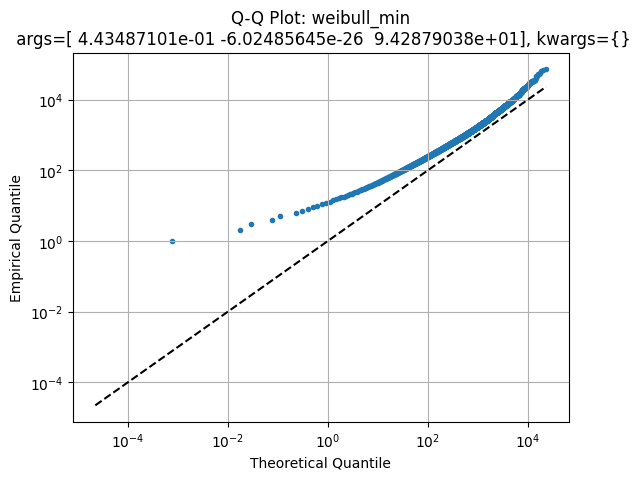

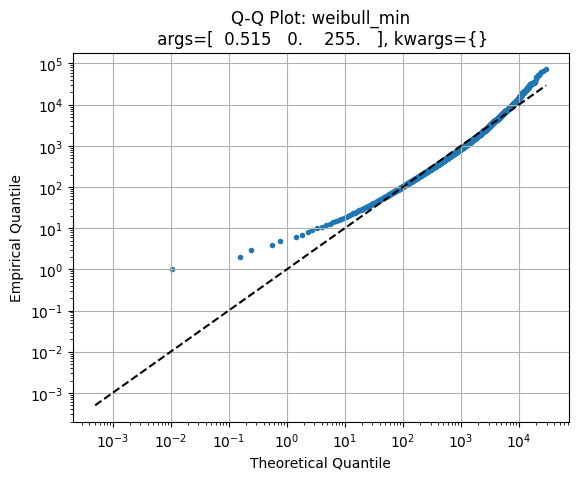

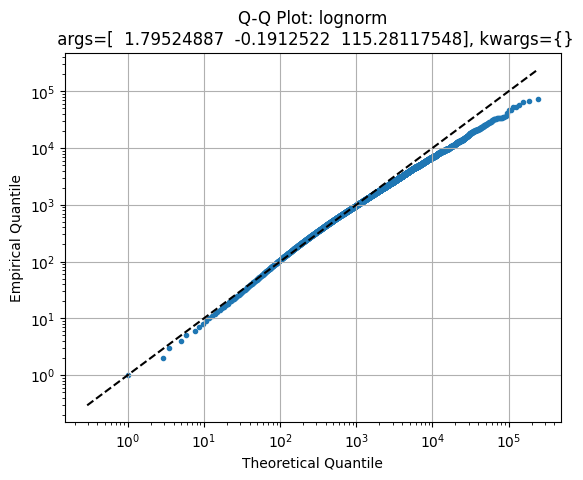

In [33]:
for law in laws:
    qqplot(x, law)

In [34]:
p0 = stats.weibull_min.fit(x)
law0 = stats.weibull_min(*p0)

In [35]:
law0.mean(), law0.std(), law0.median()

(np.float64(241.5553454875946),
 np.float64(643.6875074493704),
 np.float64(41.2610385495082))

In [36]:
p1 = stats.lognorm.fit(x)
law1 = stats.lognorm(*p1)

/home/jlandercy/.local/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6626: RuntimeWarning: divide by zero encountered in log
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)


In [37]:
law1.mean(), law1.std(), law1.median()

(np.float64(577.3809131697245),
 np.float64(2835.4776696885206),
 np.float64(115.08992327729224))

In [38]:
xlin = np.linspace(x.min(), x.max(), 200)

In [40]:
law3 = stats.weibull_min(0.515, 0., 255)

/home/jlandercy/.local/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:2581: RuntimeWarning: divide by zero encountered in power
  return c*pow(x, c-1)*np.exp(-pow(x, c))


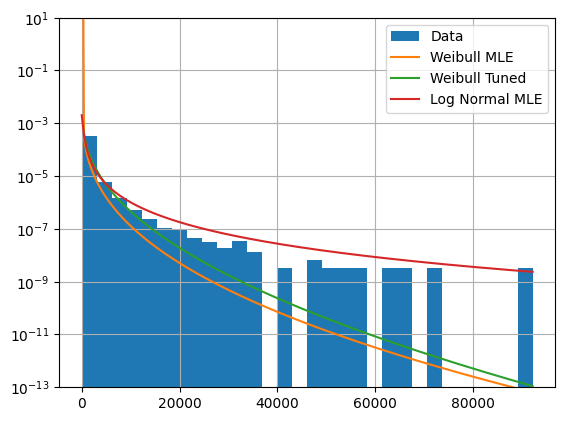

In [43]:
fig, axe = plt.subplots()
axe.hist(x, bins=30, density=1, label="Data")
axe.plot(xlin, law0.pdf(xlin), label="Weibull MLE")
axe.plot(xlin, law3.pdf(xlin), label="Weibull Tuned")
axe.plot(xlin, law1.pdf(xlin), label="Log Normal MLE")
axe.legend()
axe.set_ylim([1e-13, 1e1])
axe.set_yscale("log")
axe.grid()